In [18]:
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

<h2> data clean-up

In [19]:
df = pd.read_csv('../data/citigo_data.csv',sep=';')
print(len(df))
df.head()

219


,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,109.800 kr.,2019,17950,2019-06-26,Benzin,26.2,60,M,4600
1,104.900 kr.,2019,62000,2018-10-02,Benzin,26.2,60,M,5200
2,69.900 kr.,2016,96000,2016-03-23,Benzin,24.4,60,M,7120
3,122.900 kr.,2019,35000,2019-02-01,Benzin,26.2,60,M,8700
4,84.900 kr.,2016,88000,2016-07-25,Benzin,24.4,60,M,2635


In [20]:
#Cleans price and first regestration
df['price'] = df['price'].str.replace(r'\D','',regex=True)
df['price'] = df['price'].astype('int64')
df['reg'] = df['reg'].str.split('-').str[0]
df['reg'] = df['reg'].astype('int64')
df

,price,model_year,km,reg,fuel_type,fuel_economy,horse_power,gear_type,zip_code
0,109800,2019,17950,2019,Benzin,26.2,60,M,4600
1,104900,2019,62000,2018,Benzin,26.2,60,M,5200
2,69900,2016,96000,2016,Benzin,24.4,60,M,7120
3,122900,2019,35000,2019,Benzin,26.2,60,M,8700
4,84900,2016,88000,2016,Benzin,24.4,60,M,2635
...,...,...,...,...,...,...,...,...,...
214,64900,2014,75000,2014,Benzin,24.4,60,M,7400
215,46000,2017,175000,2017,Benzin,24.4,60,M,4200
216,79800,2018,65000,2017,Benzin,24.4,60,M,5210
217,79900,2016,66000,2016,Benzin,24.4,60,M,7700


In [21]:
#converts categorical variable into dummy/indicator variables
df = pd.get_dummies(df, columns = ['gear_type','fuel_type'])
df

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin
0,109800,2019,17950,2019,26.2,60,4600,0,1,1
1,104900,2019,62000,2018,26.2,60,5200,0,1,1
2,69900,2016,96000,2016,24.4,60,7120,0,1,1
3,122900,2019,35000,2019,26.2,60,8700,0,1,1
4,84900,2016,88000,2016,24.4,60,2635,0,1,1
...,...,...,...,...,...,...,...,...,...,...
214,64900,2014,75000,2014,24.4,60,7400,0,1,1
215,46000,2017,175000,2017,24.4,60,4200,0,1,1
216,79800,2018,65000,2017,24.4,60,5210,0,1,1
217,79900,2016,66000,2016,24.4,60,7700,0,1,1


In [22]:
#selects target and features
X = df[['model_year', 'km','reg','fuel_economy','horse_power','gear_type_A','gear_type_M','fuel_type_Benzin']]
y = df['price']

In [23]:
#Test train split of data, 33% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

<h2> Linear Regression model

In [24]:
#fits model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

#degree of linear correlation between data and target
print(f'Regression score: {regr.score(X_train,y_train)}')

Regression score: 0.8715205335525116


In [25]:
#Test of 5 cars
print(f'Car 1: Predicted price: {regr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {regr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {regr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {regr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {regr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 41838.94kr - actual price: 44700kr
Car 2: Predicted price: 91953.9kr - actual price: 96800kr
Car 3: Predicted price: 87687.62kr - actual price: 79800kr
Car 4: Predicted price: 79770.0kr - actual price: 79900kr
Car 5: Predicted price: 59219.04kr - actual price: 64900kr


In [26]:
#Method to get prediction score
def get_prediction_score(target,pred_target):
    score_list = []
    for num1,num2 in zip(target,pred_target):
        if num1 > num2:
            score_list.append(num2/num1*100)
        elif num2 > num1:
            score_list.append(num1/num2*100)
        else:
            score_list.append(100)
    return sum(score_list) / len(score_list)

In [27]:
#Test of prediction score
y_pred = regr.predict(X_test)
get_prediction_score(y_test,y_pred)

91.4243791179177

<h2> Decision tree regressor

In [28]:
#Fit and model score
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
#predictions = model.predict(X_test)
dtr.score(X_test, y_test)

0.7207466368717981

In [29]:
#Test of 5 cars
print(f'Car 1: Predicted price: {dtr.predict(X_test[0:1])[0].round(2)}kr - actual price: {y_test[0:1].values[0]}kr')
print(f'Car 2: Predicted price: {dtr.predict(X_test[1:2])[0].round(2)}kr - actual price: {y_test[1:2].values[0]}kr')
print(f'Car 3: Predicted price: {dtr.predict(X_test[2:3])[0].round(2)}kr - actual price: {y_test[2:3].values[0]}kr')
print(f'Car 4: Predicted price: {dtr.predict(X_test[3:4])[0].round(2)}kr - actual price: {y_test[3:4].values[0]}kr')
print(f'Car 5: Predicted price: {dtr.predict(X_test[4:5])[0].round(2)}kr - actual price: {y_test[4:5].values[0]}kr')

Car 1: Predicted price: 54900.0kr - actual price: 44700kr
Car 2: Predicted price: 74800.0kr - actual price: 96800kr
Car 3: Predicted price: 79900.0kr - actual price: 79800kr
Car 4: Predicted price: 73700.0kr - actual price: 79900kr
Car 5: Predicted price: 62900.0kr - actual price: 64900kr


In [30]:
#Test of prediction score
y_pred = dtr.predict(X_test)
get_prediction_score(y_test,y_pred)

88.48789711327969

<h1>data visualization

,price,model_year,km,reg,fuel_economy,horse_power,zip_code,gear_type_A,gear_type_M,fuel_type_Benzin
price,1.000000,0.762828,-0.789629,0.771832,0.456792,-0.080688,0.036538,0.240897,-0.240897,NaN
model_year,0.762828,1.000000,-0.523221,0.975031,0.631509,-0.292695,0.023842,-0.136015,0.136015,NaN
km,-0.789629,-0.523221,1.000000,-0.539492,-0.368296,0.148884,0.019691,-0.153119,0.153119,NaN
reg,0.771832,0.975031,-0.539492,1.000000,0.633551,-0.289543,0.065832,-0.144078,0.144078,NaN
fuel_economy,0.456792,0.631509,-0.368296,0.633551,1.000000,-0.434496,0.040685,-0.368071,0.368071,NaN
horse_power,-0.080688,-0.292695,0.148884,-0.289543,-0.434496,1.000000,0.059380,0.256780,-0.256780,NaN
zip_code,0.036538,0.023842,0.019691,0.065832,0.040685,0.059380,1.000000,-0.083121,0.083121,NaN
gear_type_A,0.240897,-0.136015,-0.153119,-0.144078,-0.368071,0.256780,-0.083121,1.000000,-1.000000,NaN
gear_type_M,-0.240897,0.136015,0.153119,0.144078,0.368071,-0.256780,0.083121,-1.000000,1.000000,NaN
fuel_type_Benzin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


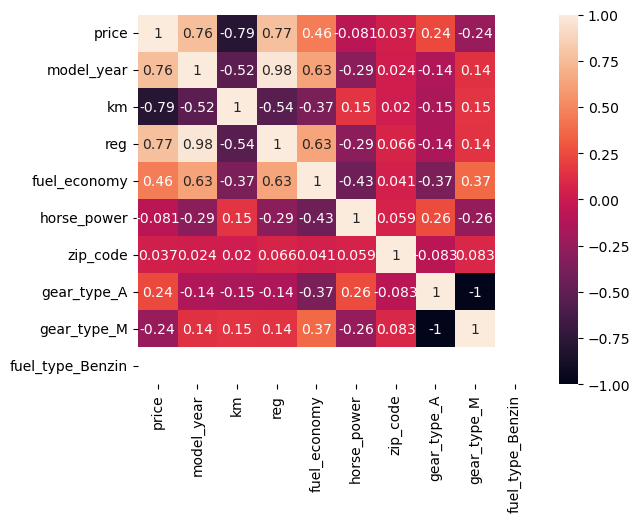

In [31]:
#Heatmap to show correlation between target and feautres
sns.heatmap(df.corr(), annot=True)
df.corr()

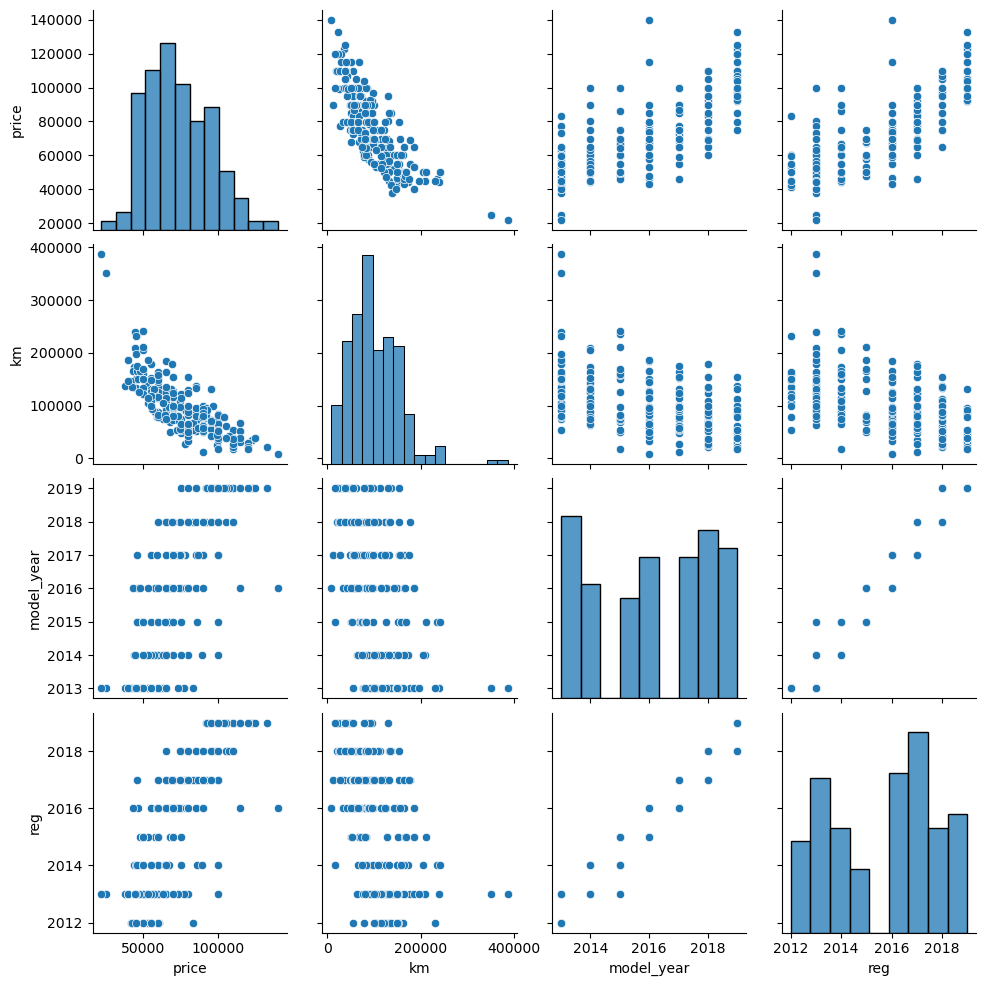

In [32]:
#Plots
sns.pairplot(df[['price','km','model_year','reg']])

<AxesSubplot:xlabel='price', ylabel='km'>

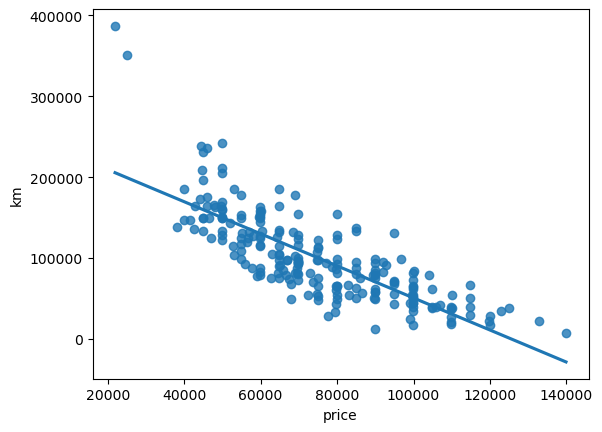

In [33]:
#regplot with price and model year
sns.regplot(x=df['price'], y=df['km'], ci=None)

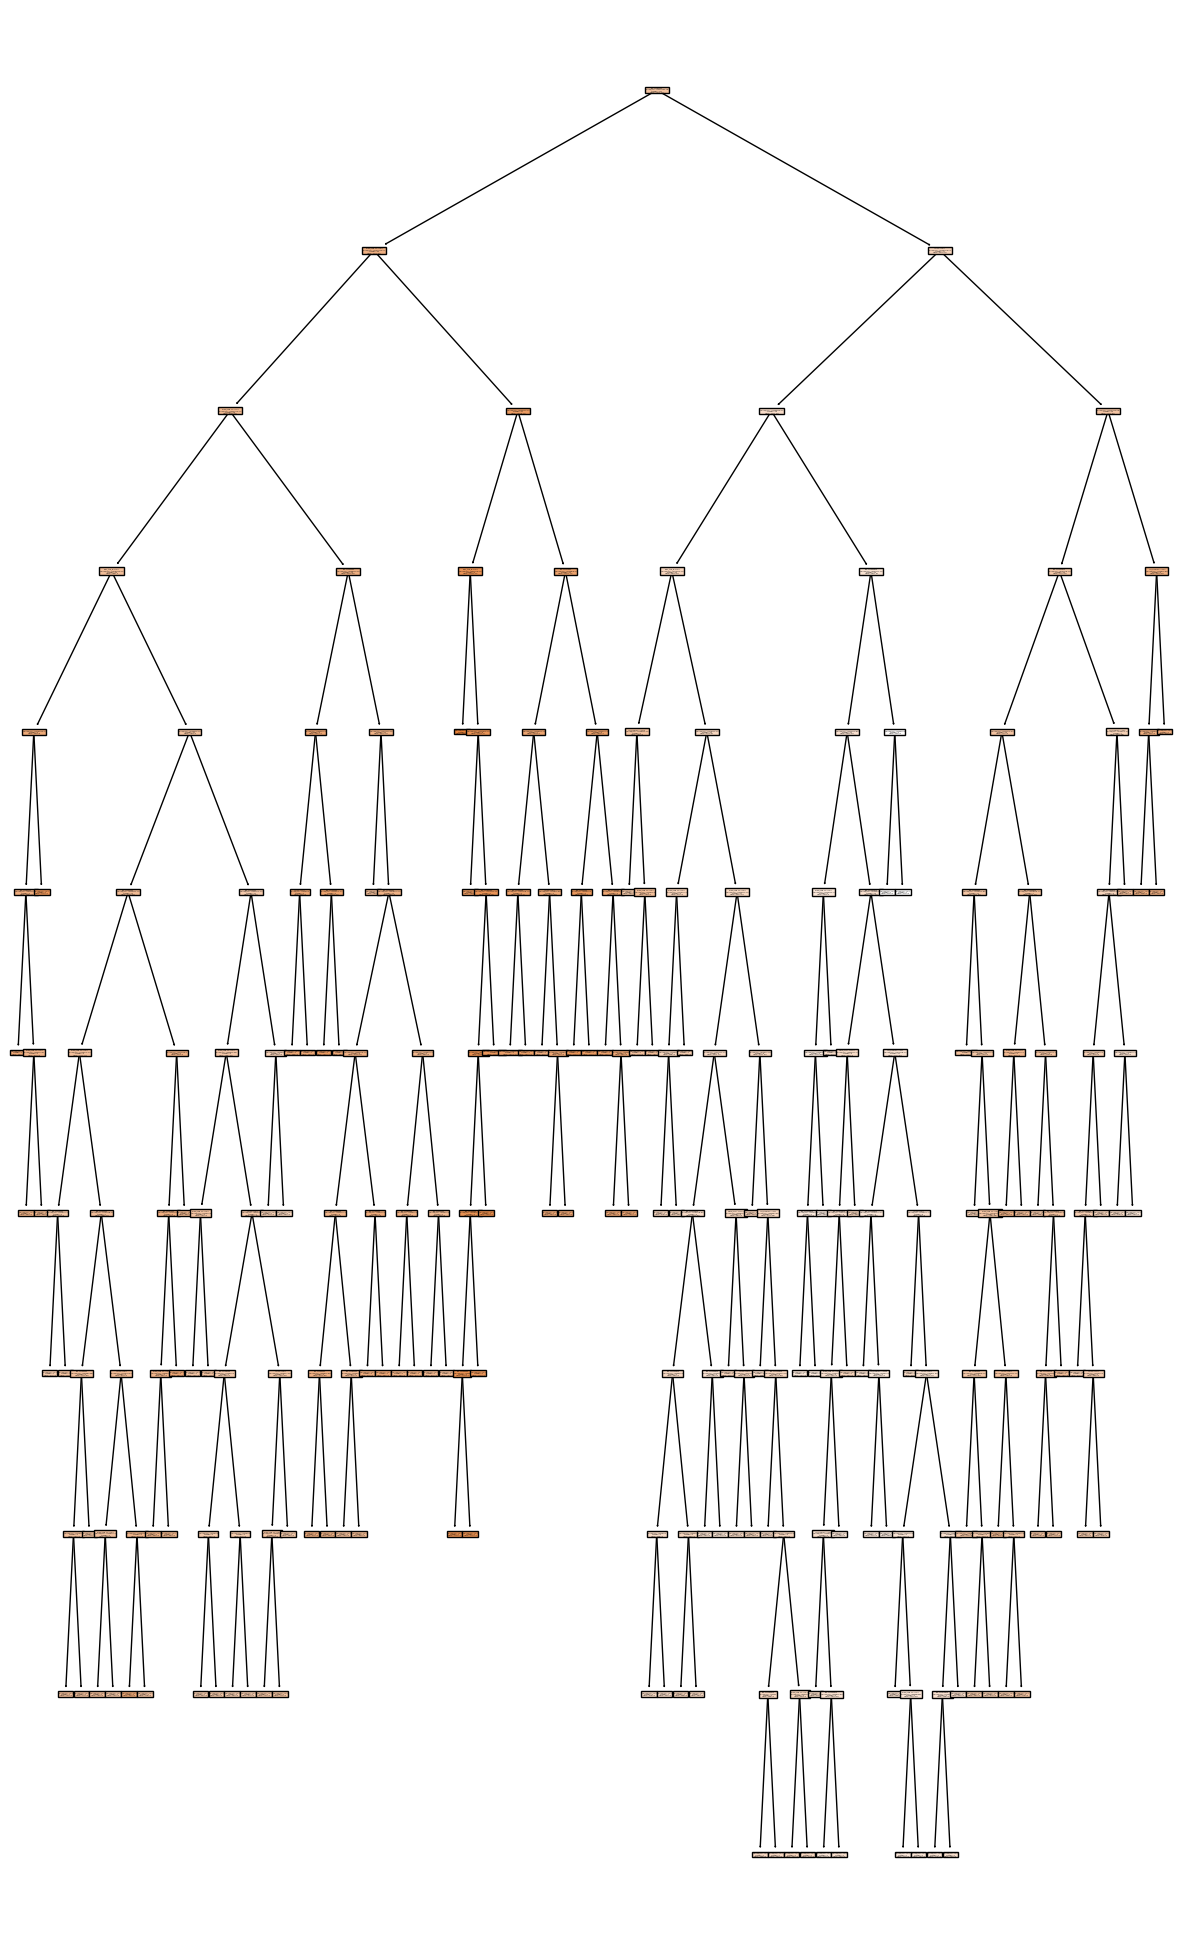

In [34]:
#map of the descision tree
fig = plt.figure(figsize=(15,25))
_= tree.plot_tree(dtr, feature_names=X.columns, filled=True)